IMDB Dataset

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.0
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
       loss='binary_crossentropy',
       metrics=['accuracy'])
history = model.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 34ms/step - loss: 0.5931 - accuracy: 0.6989 - val_loss: 0.3950 - val_accuracy: 0.8643
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3292 - accuracy: 0.9013 - val_loss: 0.3081 - val_accuracy: 0.8904
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2324 - accuracy: 0.9286 - val_loss: 0.2839 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1833 - accuracy: 0.9424 - val_loss: 0.2805 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1459 - accuracy: 0.9558 - val_loss: 0.2871 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1188 - accuracy: 0.9673 - val_loss: 0.2920 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0951 - accuracy: 0.9763 - val_loss: 0.3022 - val_accuracy: 0.8844
Epoch 8/20
30

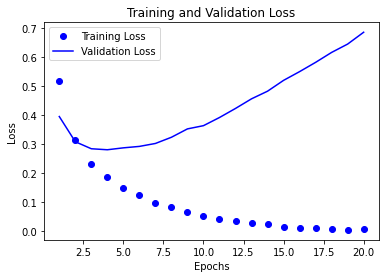

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

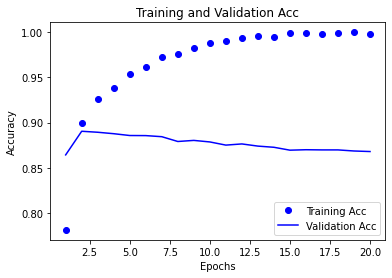

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We'll choose epochs = 4 by the two plots above.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
       loss='binary_crossentropy',
       metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5604 - accuracy: 0.7356
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2845 - accuracy: 0.9037
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2013 - accuracy: 0.9337
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2958 - accuracy: 0.8831


In [ ]:
model.predict(x_test)

array([[0.19003333],
       [0.99967337],
       [0.93167657],
       ...,
       [0.12064485],
       [0.12881248],
       [0.70156336]], dtype=float32)

Reuters Dataset

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.0
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

one_hot_train_labels = vectorize_sequence(train_labels, dimension=46)
one_hot_test_labels = vectorize_sequence(test_labels, dimension=46)

In [ ]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
model.compile(optimizer='rmsprop',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

history = model.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 27ms/step - loss: 3.1475 - accuracy: 0.4211 - val_loss: 1.7599 - val_accuracy: 0.6640
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5091 - accuracy: 0.7132 - val_loss: 1.2850 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0690 - accuracy: 0.7747 - val_loss: 1.1058 - val_accuracy: 0.7690
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8116 - accuracy: 0.8238 - val_loss: 1.0170 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6419 - accuracy: 0.8654 - val_loss: 0.9694 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5243 - accuracy: 0.8931 - val_loss: 0.9380 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4215 - accuracy: 0.9151 - val_loss: 0.9108 - val_accuracy: 0.8150
Epoch 8/20
16

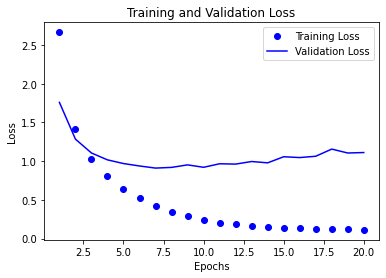

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

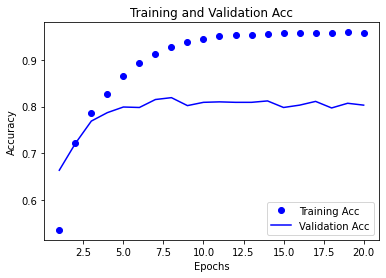

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We'll choose epochs = 9 by the two plots above.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
18/18 [==============================] - 1s 12ms/step - loss: 3.1282 - accuracy: 0.4547
Epoch 2/9
18/18 [==============================] - 0s 11ms/step - loss: 1.4247 - accuracy: 0.7135
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 1.0420 - accuracy: 0.7819
Epoch 4/9
18/18 [==============================] - 0s 11ms/step - loss: 0.8044 - accuracy: 0.8323
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.6092 - accuracy: 0.8709
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4849 - accuracy: 0.8973
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.3946 - accuracy: 0.9162
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3143 - accuracy: 0.9306
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9670 - accuracy: 0.7961


In [ ]:
model.predict(x_test)

array([[2.1829328e-04, 5.6282086e-05, 4.9188125e-06, ..., 2.9040168e-05,
        8.6913661e-07, 4.2375323e-06],
       [9.7329859e-03, 1.0935725e-02, 2.6923386e-05, ..., 1.9708637e-05,
        1.7557056e-04, 9.4760326e-06],
       [6.9052991e-03, 8.5128254e-01, 1.0210836e-03, ..., 2.2016160e-04,
        2.5081776e-05, 5.9510843e-04],
       ...,
       [7.7775716e-05, 2.3635699e-04, 1.8331006e-05, ..., 3.4398429e-06,
        3.6592903e-07, 5.3944118e-06],
       [3.1344838e-02, 5.3475846e-02, 1.0595629e-03, ..., 5.8277050e-04,
        8.7817774e-05, 2.3402911e-04],
       [5.0541493e-03, 4.1097355e-01, 4.4980198e-03, ..., 7.2682952e-04,
        4.6505134e-05, 5.7497661e-04]], dtype=float32)

Boston House Price

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [17]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [21]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('process #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_target = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i+1) * num_val_samples:]], axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i+1) * num_val_samples:]], axis = 0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_target, verbose = 0)
  all_scores.append(val_mae)

process # 0
process # 1
process # 2
process # 3


In [22]:
np.mean(all_scores)

2.3917568922042847

In [23]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('process #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_target = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i+1) * num_val_samples:]], axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i+1) * num_val_samples:]], axis = 0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_target), epochs = num_epochs, batch_size = 1, verbose = 0)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

process # 0
process # 1
process # 2
process # 3


In [24]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

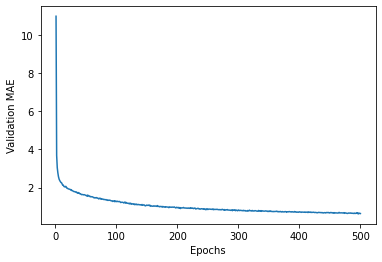

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

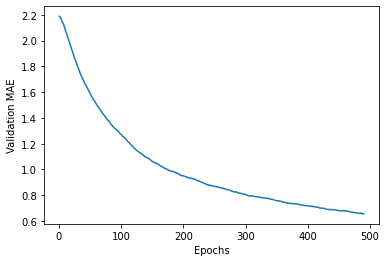

In [31]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * (1-factor) + point * factor)
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [27]:
model = build_model()
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 17.9008 - mae: 2.6287
